<center><font size = "10"> Week 8 - Synapses <center>
<center><font size = "8">Home work - Solutions<center>

In [2]:
!nrnivmodl

/home/NX450_2023/week8_synapses_STP/week8_synapses
Mod files: "./NaTs2_t.mod" "./SK_E2.mod" "./SKv3_1.mod" "./SimpleAMPA_NMDA.mod" "./TsodyksMarkram_AMPA_NMDA.mod" "./vecevent.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.so
Successfully created x86_64/special


# Ex 1: Plot the dependence of the NMDA conductance on the Mg2+ concentration.

<font size='3'>Create a single compartmental soma neuron to host the synpase modeled in SimpleAMPA_NMDA.mod file. Using the stimulation pattern and the values for the synaptic conductances used in tutorial 01, plot the NMDA conductance at different mM [Mg2+] values. Select appropiate values to explore the dynamics. 
    
<font size='3'> What happens to the NMDA conducatance in relation to Mg2+? What is the functional purpose of this behaviour?

In [3]:
import neuron
from neuron import h
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load external files & initialize
h.load_file("stdrun.hoc")
h.stdinit()

--No graphics will be displayed.


0.0

In [4]:
# Create a single compartmental soma neuron
soma = neuron.h.Section()
soma.L = 40
soma.diam = 40
soma.insert("pas")

# Configure the passive biophysics
for sec in h.allsec():
    sec.Ra = 100
    sec.cm = 1

synapse = h.SimpleAMPA_NMDA(soma(0.5))

# Simulation pattern
stimulator = h.VecStim()
spike_times = [100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 950.0]
spikes_vector = h.Vector(spike_times)
stimulator.play(spikes_vector)

connection = h.NetCon(stimulator, synapse)
connection.weight[
    0
] = 1.0  # In units of [nS] due to the gmax scaling factor in our .mod file

# Recorder
g_syn = h.Vector()
g_syn.record(synapse._ref_g)
i_syn = h.Vector()
i_syn.record(synapse._ref_i)
v_soma = h.Vector()
v_soma.record(soma(0.5)._ref_v)
time = h.Vector()
time.record(neuron.h._ref_t)

Vector[4]

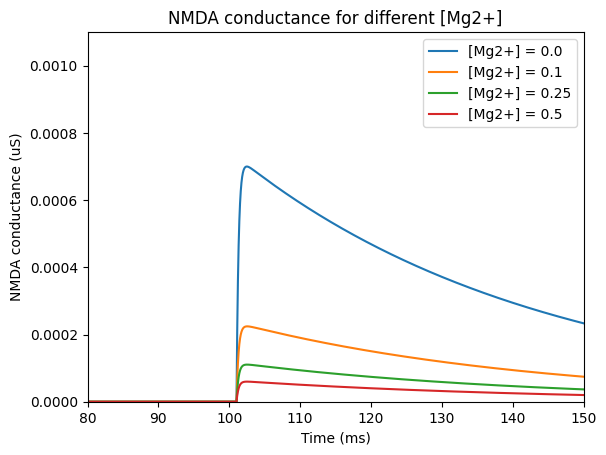

In [5]:
h.tstop = 1100.0  # ms

# synapse.gmax_AMPA = 0.001 # uS
synapse.gmax_AMPA = 0
synapse.gmax_NMDA = (
    0.7 * 0.001
)  # uS - 0.7 is a biologically typical ratio of NMDA to AMPA conductance

g_NMDA = h.Vector()
g_NMDA.record(synapse._ref_g_NMDA)

plt.figure()
for mg in [0.0, 0.1, 0.25, 0.5]:
    synapse.mg = mg
    h.run()
    plt.plot(time, g_NMDA, label="[Mg2+] = " + str(synapse.mg))

plt.axis([80.0, 150.0, 0.0, 0.0011])
plt.xlabel("Time (ms)")
plt.ylabel("NMDA conductance (uS)")
plt.title("NMDA conductance for different [Mg2+]")
plt.legend();

## Answers:
    
<font sie='3'>The plot shows a marked in crease in g_NMDA as a function of [Mg2+] decreasing. The higher the concentration of magnesium, the lower the conductace of NMDA. 

<font sie='3'> The NMDA receptor requires the presence of Mg2+ for the voltage block to be effective, the presence of magnesium blocks the pore entry of NDMA receptor at negative potentials (voltage-dependent magnesium block).


# Ex 2:  Configure a pseudolinear synapse (E3)
    
<font size='3'> Create a single compartmental soma neuron, add to it passive properties, add to the center of the neuron a synapse with the mechanism modeled in TsodyksMarkram_AMPA_NMDA.mod file, inject a stimulation pattern and define the conductances for NMDA and AMPA receptors, as it was done in tutorial 02. 

<font size='3'>Play around with `U1`, `tau_rec` and `tau_facil` , and find the values that make the synapse _pseudolinear_, so that it first undergoes facilitation, and then a depression as the stimulus goes on for longer. 

<font size='3'> Plot the `R`, `Use` and conductance curves. Explain in your own words what `U1`, `tau_rec` and `tau_facil` represent.
    
<font size='3'>Plot comparison (bar plot) between the three parameters for each of the three synapse types(facilitating, depressing and pseudolinear). Explain the relationships between the parameter values and the properties of the synapse type they belong to.

### Answer 
- **U1** is the baseline probability of release
- **tau_rec** describes the time constant until the synapse has recovered from depression and 
- **tau_facil** describes the time constant for recovery from facilitation 

Possible values for a pseudolinear synapse are
```
synapse2.U1 = 0.2  # Baseline release probability
synapse2.tau_rec = 200  # ms - recovery from depression
synapse2.tau_facil = 200  # ms - relaxation from facilitation . 
```
basically, relatively low release probability and similar time constants. 

In [6]:
import neuron
from neuron import h
import numpy as np
import h5py

import matplotlib.pyplot as plt

%matplotlib inline

# Load external files & initialize
h.load_file("stdrun.hoc")
h.stdinit()

soma2 = neuron.h.Section()
soma2.L = 40
soma2.diam = 40
soma2.insert("pas")

# Configure the passive biophysics
for sec in h.allsec():
    sec.Ra = 100
    sec.cm = 1

synapse2 = h.TsodyksMarkram_AMPA_NMDA(soma(0.5))

In [7]:
stimulator2 = h.VecStim()
spike_times2 = [100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 950.0]
spikes_vector2 = h.Vector(spike_times2)
stimulator2.play(spikes_vector2)

connection2 = h.NetCon(stimulator2, synapse2)
connection2.weight[
    0
] = 1.0  # In units of [nS] due to the gmax scaling factor in our .mod file

In [8]:
g_syn2 = h.Vector()
g_syn2.record(synapse2._ref_g)
i_syn2 = h.Vector()
i_syn2.record(synapse2._ref_i)
v_soma2 = h.Vector()
v_soma2.record(soma2(0.5)._ref_v)
time2 = h.Vector()
time2.record(neuron.h._ref_t)
R_syn2 = h.Vector()
R_syn2.record(synapse2._ref_R)
Use_syn2 = h.Vector()
Use_syn2.record(synapse2._ref_Use)

Vector[12]

In [9]:
synapse2.gmax_AMPA = 0.002  # uS
synapse2.gmax_NMDA = (
    0.7 * 0.002
)  # uS - 0.7 is a biologically typical ratio of NMDA to AMPA conductance
synapse2.mg = 1.0  # mM

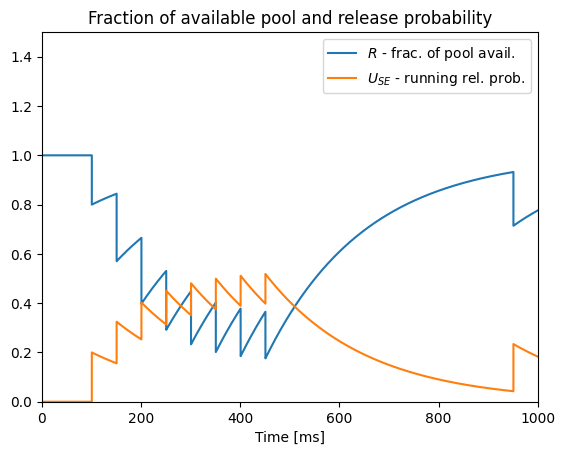

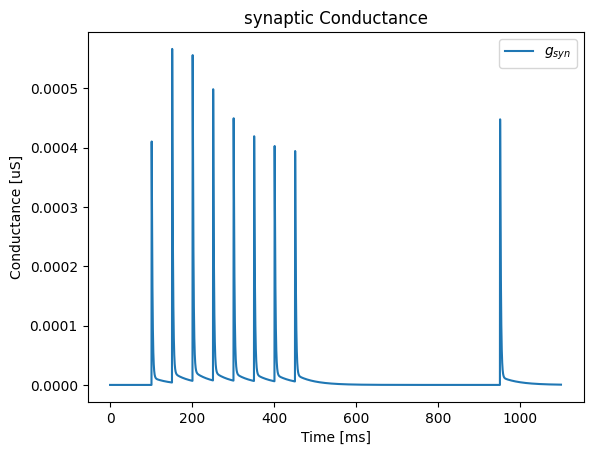

In [10]:
synapse2.U1 = 0.2  # Baseline release probability
synapse2.tau_rec = 200  # ms - recovery from depression
synapse2.tau_facil = 200  # ms - relaxation from facilitation

h.run()

plt.figure()
plt.plot(time2, R_syn2, label="$R$ - frac. of pool avail.")
plt.plot(time2, Use_syn2, label="$U_{SE}$ - running rel. prob.")
plt.legend()
plt.axis([0, 1000, 0, 1.5])
plt.xlabel("Time [ms]")
plt.title("Fraction of available pool and release probability")

plt.figure()
plt.plot(time2, g_syn2, label="$g_{syn}$")
plt.legend()
plt.title("synaptic Conductance")
plt.xlabel("Time [ms]")
plt.ylabel("Conductance [uS]")
plt.show()

### Compare Parameter Values Between 3 version of synapses (depressing and pseudolinear from the Tutorial 2)

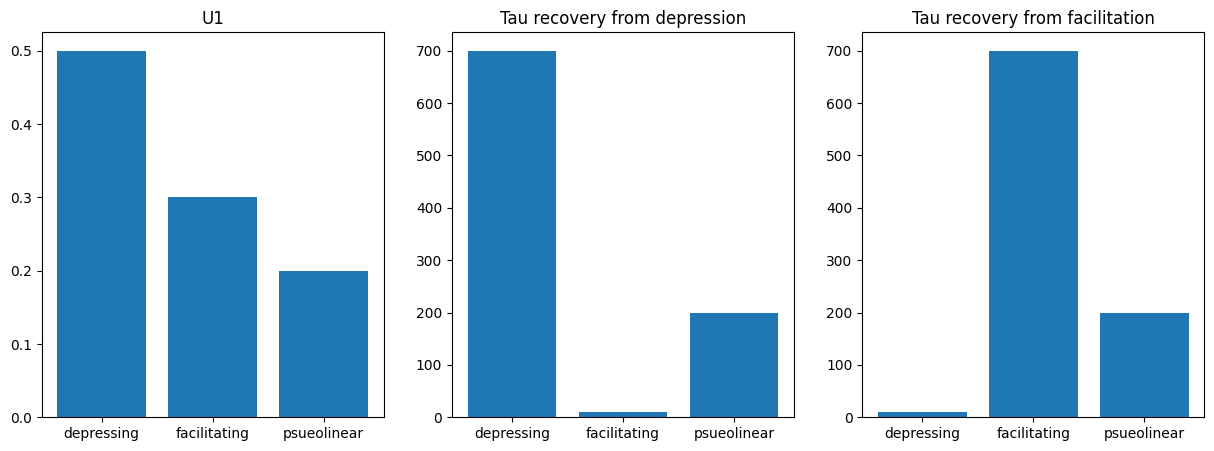

In [11]:
U1 = {
    "depressing": 0.5,
    "facilitating": 0.3,
    "psueolinear": 0.2,
}

tau_rec = {
    "depressing": 700,
    "facilitating": 10,
    "psueolinear": 200,
}

tau_facil = {
    "depressing": 10,
    "facilitating": 700,
    "psueolinear": 200,
}

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].bar(U1.keys(), U1.values())
ax[1].bar(tau_rec.keys(), tau_rec.values())
ax[2].bar(tau_facil.keys(), tau_facil.values())

ax[0].set_title("U1")
ax[1].set_title("Tau recovery from depression")
ax[2].set_title("Tau recovery from facilitation");

# Ex 3:  Compute EPSP's Features: amplitudes, latencies, tau rise and Coefficient of Variation (CV) of the EPSP amplitudes 

<font size='3'>Compute the amplitudes, latencies and tau rise of the excitatory postsynaptic potential (EPSP) of the three connections traces provided for your group (.h5 files you can find in the group folder). Visualize the mean values and standard deviations of this features.


<font size='3'>Then compute the coefficient of variation of EPSP amplitudes for each of the connections and the mean CV profile between them. Visualize your results in two plots:
- mean CV profiles: the plot should have four curves, one per each connection and one for the mean
- raster plot of CV of EPSP amplitudes as a function of EPSP amplitudes (all EPSPS, not only the first one)

<font size='3'>Both plots should look similar to the ones in the paper show in the lecture [Barros-Zulaica et al., 2019](https://www.ncbi.nlm.nih.gov/pubmed/31680928), Figure 1 D and F and Figure 6 D and F. 
    
<font size='3'>*Hint: Be careful with which plot should have a standard deviations!*
    
__Note that for all the files, the stimulation times are the same as in tutorial 3.__

In [12]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
files = [
    "data/connection_c1.h5",
    "data/connection_c2.h5",
    "data/connection_c4.h5",
]

In [14]:
def load_traces(filename):
    data = h5py.File(filename, "r")
    data.keys()

    traces = []
    for key in data.keys():
        traces.append(data.get(key))

    return np.array(traces)

In [15]:
traces_collection = {}
for n, file in enumerate(files):
    traces_collection[n] = load_traces(file)

time = np.arange(0, 1.3, 0.0001)
stimulation_indices = np.array([1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 10000])


In [16]:
def extract_PSP_window(trace, time, stimulation_index, time_before=50, time_after=300):
    """Extract a time window with a single EPSP trace"""
    psp_trace = trace[stimulation_index - time_before : stimulation_index + time_after]
    psp_time = time[stimulation_index - time_before : stimulation_index + time_after]

    return psp_trace, psp_time

In [17]:
def extract_tau_latency(psp_trace, psp_time, stimulation_time):
    """
    Function takes in a EPSP curve and calculates the following features: amplitude;
    5%, 20% and 80% of the amplitude, tau rise and latency. Based on defintions from
    Feldmeyer et al., 1999.

    Parameters
    ----------
    psp_trace : array with voltage trace [mV]
    psp_time : array of psp times [s]
    stimulation_time : time of the stimulation [s]

    Returns
    -------
    tau_rise : distance between the time of 20% and 80% of the rise of the EPSP [s]
    latency : time between the AP of the presynaptic cell and 5% amplitude rise of the EPSP [s]
    """

    # find absolute values of the psp trace
    max_psp = np.max(psp_trace)
    min_psp = np.min(psp_trace)
    amplitude_psp = np.abs(max_psp - min_psp)

    # compute percentages of amplitudes
    twenty_amplitude = amplitude_psp * 80.0 / 100.0
    eighty_amplitude = amplitude_psp * 20.0 / 100.0
    five_amplitude = amplitude_psp * 95.0 / 100.0
    amplitude = eighty_amplitude - twenty_amplitude

    # compute amplitude percentages on the psp trace
    psp_percent = {
        "five": -(five_amplitude - max_psp),
        "twenty": -(twenty_amplitude - max_psp),
        "eighty": -(eighty_amplitude - max_psp),
    }

    # find corresponding index of an array
    five_index = np.where(psp_trace >= psp_percent["five"])[0][0]
    twenty_index = np.where(psp_trace >= psp_percent["twenty"])[0][0]
    eighty_index = np.where(psp_trace >= psp_percent["eighty"])[0][0]

    # extract time points for percentage points of the trace
    psp_times = {
        "five": psp_time[five_index],
        "twenty": psp_time[twenty_index],
        "eighty": psp_time[eighty_index],
    }

    # calculate time features of a PSP
    tau_rise = np.abs((psp_times["twenty"] - psp_times["eighty"]))
    latency = np.abs((psp_times["five"]) - stimulation_time)

    return amplitude_psp*1000, tau_rise, latency

In [18]:
def extract_all_amps_taus_latencies(trace, stimulation_indices, time):
    taus = np.array([])
    latencies = np.array([])
    amplitudes = np.array([])


    for index in stimulation_indices:
        psp_trace, psp_time = extract_PSP_window(trace, time, index)
        amp, tau_rise, latency = extract_tau_latency(psp_trace, psp_time, time[index])

        taus = np.append(taus, tau_rise)
        latencies = np.append(latencies, latency)
        amplitudes = np.append(amplitudes, amp)


    return amplitudes, taus, latencies

In [19]:
taus_collection = {}
latencies_collection = {}
amplitudes_collection = {}

for key in traces_collection:
    traces = traces_collection[key]
    all_amplitudes, all_taus, all_latencies = extract_all_amps_taus_latencies(
        traces[0], stimulation_indices, time
    )

    for trace in traces[1:]:
        amps, taus, latencies = extract_all_amps_taus_latencies(trace, stimulation_indices, time)
        all_taus = np.vstack([all_taus, taus])
        all_latencies = np.vstack([all_latencies, latencies])
        all_amplitudes = np.vstack([all_amplitudes, amps])

    taus_collection[key] = all_taus
    latencies_collection[key] = all_latencies
    amplitudes_collection[key] = all_amplitudes    

In [20]:
CVs = {}
for key in amplitudes_collection:
    all_amplitudes = amplitudes_collection[key]
    CVs[key] = all_amplitudes.std(axis=0) / all_amplitudes.mean(axis=0)

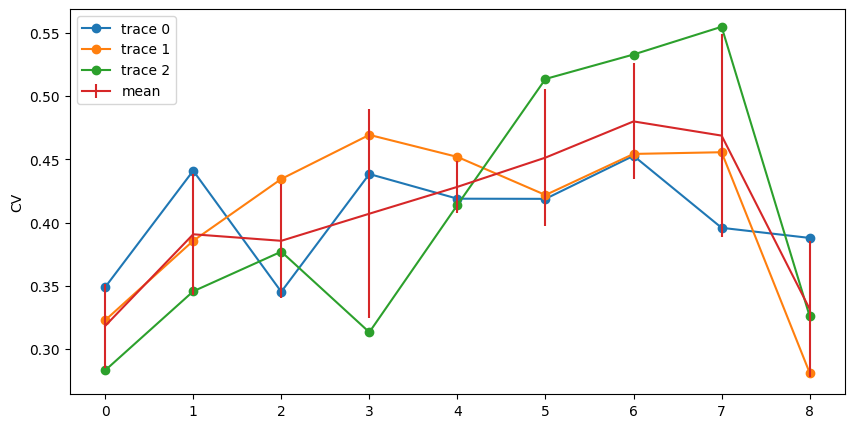

In [21]:
df = pd.DataFrame(CVs)

plt.figure(figsize=(10, 5))
plt.plot(df[0], "o-", label="trace 0")
plt.plot(df[1], "o-", label="trace 1")
plt.plot(df[2], "o-", label="trace 2")

plt.errorbar(
    df.mean(axis=1).index,
    df.mean(axis=1).values,
    yerr=df.std(axis=1),
    label="mean",
)
plt.ylabel("CV")
plt.legend();

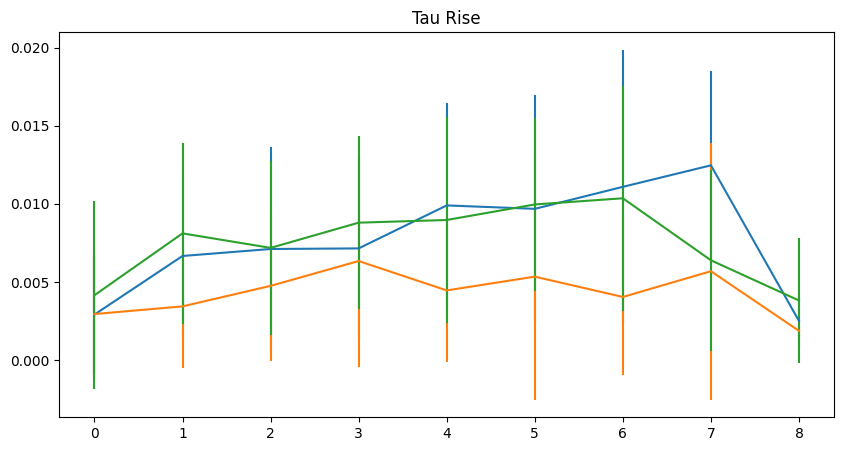

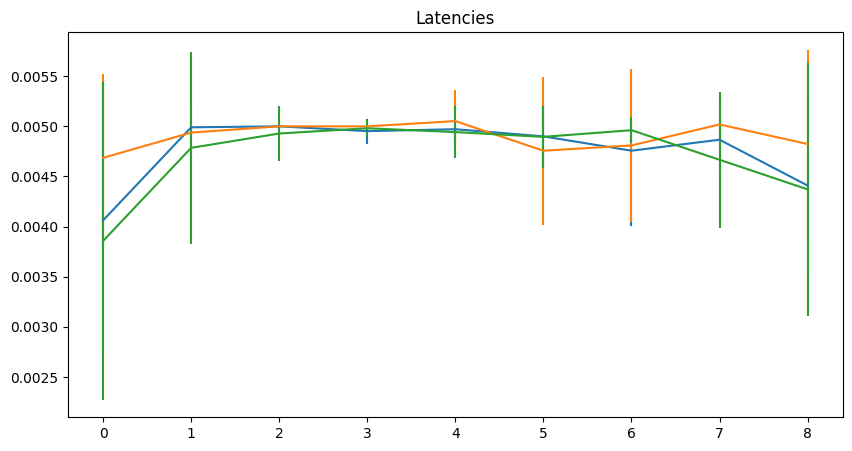

In [22]:
plt.figure(figsize=(10, 5))

for n in np.arange(0, 3):
    plt.errorbar(
        np.arange(0, 9),
        taus_collection[n].mean(axis=0),
        yerr=taus_collection[n].std(axis=0),
    )
    
plt.title('Tau Rise');

plt.figure(figsize=(10, 5))

for n in np.arange(0, 3):
    plt.errorbar(
        np.arange(0, 9),
        latencies_collection[n].mean(axis=0),
        yerr=latencies_collection[n].std(axis=0),
    )
    
plt.title('Latencies');

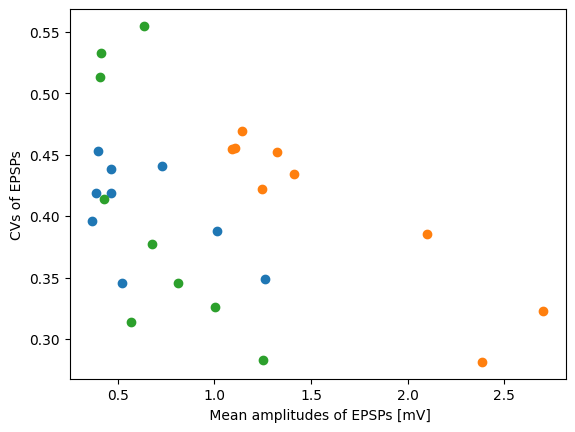

In [23]:
plt.scatter(amplitudes_collection[0].mean(axis=0), CVs[0])
plt.scatter(amplitudes_collection[1].mean(axis=0), CVs[1])
plt.scatter(amplitudes_collection[2].mean(axis=0), CVs[2])
plt.xlabel(" Mean amplitudes of EPSPs [mV]")
plt.ylabel("CVs of EPSPs");

# Ex 4: Compute failure rate

<font size='3'>Compute the failure rate of the EPSPs from the connections of your group folder. The failure rate is the fraction of trials from which no PSP is generated above certain threshold. You can find a way of computing the failure rate in [Feldmeyer et al., 1999](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2269646/). Make sure to test for failure based on both latency and amplitude size. Necessary noise can be extracted from the initial part of the simulation, before any stimulus arrives. 

    
<font size='3'>Represent the mean result of each of the three connections in a bar plot. For each connection visualize the distributions of the EPSPs amplitudes using a histogram, with a different color for failed and successful EPSPs.

### ANSWER:

Failures were defined as events with amplitudes less than 1.5 * noise and/or latencies larger than 2.5 * the mean latency.


In [24]:
def compute_noise(trace, stimulation_index, time_before=50):
    pre_psp_trace = trace[0 : stimulation_index - time_before]
    noise_max = np.max(psp_trace)
    noise_min = np.min(psp_trace)
    noise_amp = np.abs(noise_max - noise_min)
    return noise_amp * 1000

In [ ]:
noise_collection = {}
for key, traces in traces_collection.items():
    noise = []
    for psp_trace in traces:
        noise.append(compute_noise(psp_trace, stimulation_indices[0]))

    noise_collection[key] = np.array(noise)
    
noise_std = pd.DataFrame(noise_collection).std()

In [26]:
def calculate_failure_rate(amplitudes, latencies, noise_std):
    failure = 0
    total = 0

    latency_average = np.mean(latencies.mean(axis=0))
    failed_amps, correct_amps = [], []
    for amps, lats in zip(amplitudes, latencies):
        for amp, lat in zip(amps, lats):
            if amp < 1.5 * noise_std or lat > 2.5 * np.mean(latency_average):
                failure += 1
                failed_amps.append(amp)
            else:
                correct_amps.append(amp)
            total += 1

    return failure, total, failed_amps, correct_amps

In [27]:
fails0, total, failed_amps0, correct_amps0 = calculate_failure_rate(
    amplitudes_collection[0], latencies_collection[0], noise_std.iloc[0]
)

fails1, _, failed_amps1, correct_amps1 = calculate_failure_rate(
    amplitudes_collection[1], latencies_collection[1], noise_std.iloc[1]
)

fails2, _, failed_amps2, correct_amps2 = calculate_failure_rate(
    amplitudes_collection[2], latencies_collection[2], noise_std.iloc[2]
)

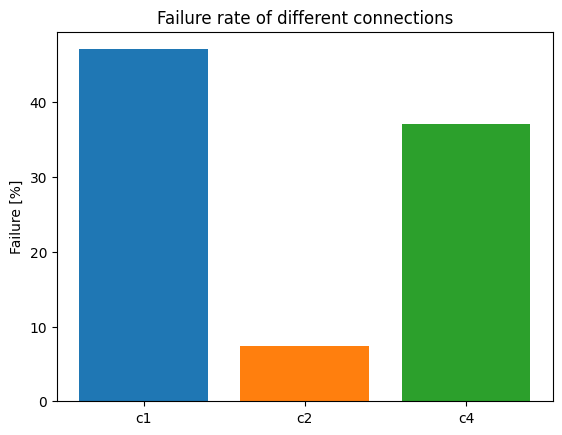

In [28]:
data_name = ["c1", "c2", "c4"]
fails = [fails0, fails1, fails2]
plt.bar(data_name[0], fails[0] / total * 100)
plt.bar(data_name[1], fails[1] / total * 100)
plt.bar(data_name[2], fails[2] / total * 100)

plt.title("Failure rate of different connections")
plt.ylabel("Failure [%]");

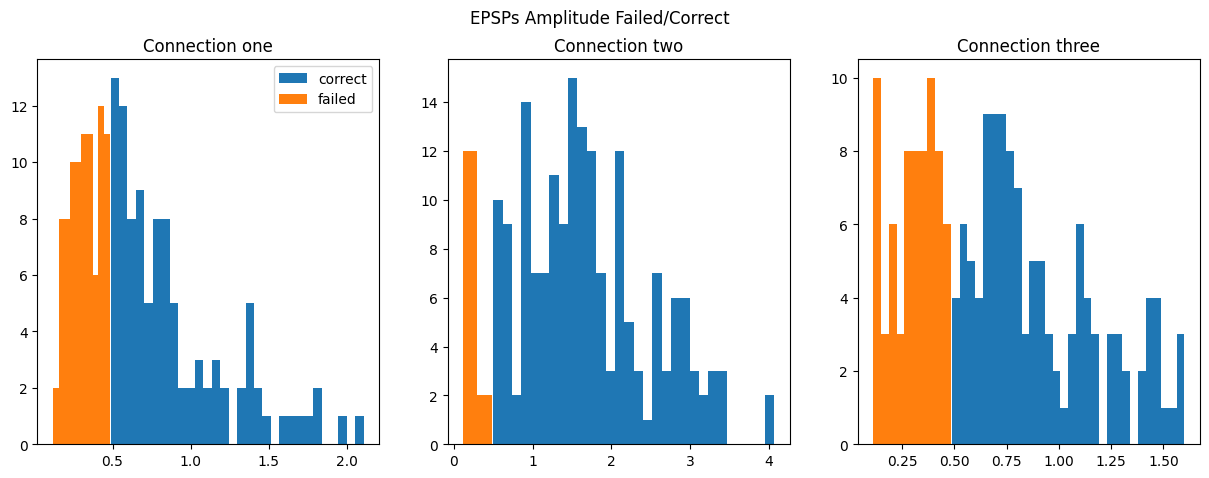

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(correct_amps0, bins=30, label="correct")
ax[0].hist(failed_amps0, label="failed")

ax[1].hist(correct_amps1, bins=30, label="correct")
ax[1].hist(failed_amps1, bins=2, label="failed")

ax[2].hist(correct_amps2, bins=30, label="correct")
ax[2].hist(failed_amps2, label="failed")

fig.suptitle("EPSPs Amplitude Failed/Correct")
ax[0].set_title("Connection one")
ax[1].set_title("Connection two")
ax[2].set_title("Connection three")
ax[0].legend();